In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


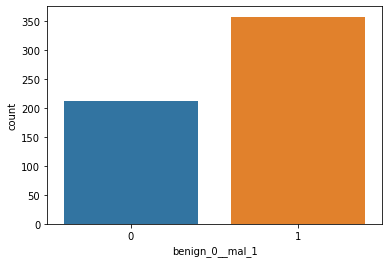

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

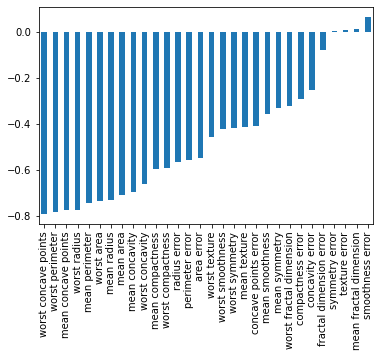

In [7]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

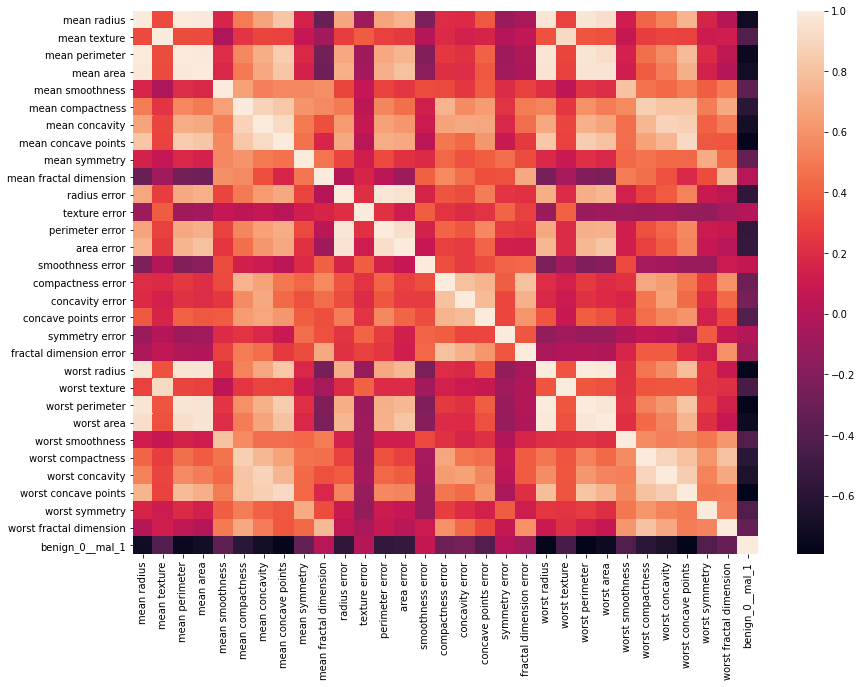

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
X.shape

(569, 30)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [18]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1 , activation="sigmoid"))


In [19]:
# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x=X_train,  y=y_train, validation_data=(X_test,y_test), epochs= 450,verbose=2)

Epoch 1/450
14/14 - 0s - loss: 0.6832 - val_loss: 0.6694
Epoch 2/450
14/14 - 0s - loss: 0.6542 - val_loss: 0.6404
Epoch 3/450
14/14 - 0s - loss: 0.6241 - val_loss: 0.6072
Epoch 4/450
14/14 - 0s - loss: 0.5888 - val_loss: 0.5694
Epoch 5/450
14/14 - 0s - loss: 0.5492 - val_loss: 0.5222
Epoch 6/450
14/14 - 0s - loss: 0.5036 - val_loss: 0.4874
Epoch 7/450
14/14 - 0s - loss: 0.4657 - val_loss: 0.4491
Epoch 8/450
14/14 - 0s - loss: 0.4303 - val_loss: 0.4191
Epoch 9/450
14/14 - 0s - loss: 0.3998 - val_loss: 0.3852
Epoch 10/450
14/14 - 0s - loss: 0.3671 - val_loss: 0.3525
Epoch 11/450
14/14 - 0s - loss: 0.3319 - val_loss: 0.3169
Epoch 12/450
14/14 - 0s - loss: 0.2948 - val_loss: 0.2834
Epoch 13/450
14/14 - 0s - loss: 0.2574 - val_loss: 0.2370
Epoch 14/450
14/14 - 0s - loss: 0.2246 - val_loss: 0.2105
Epoch 15/450
14/14 - 0s - loss: 0.1843 - val_loss: 0.1827
Epoch 16/450
14/14 - 0s - loss: 0.1568 - val_loss: 0.1605
Epoch 17/450
14/14 - 0s - loss: 0.1367 - val_loss: 0.1628
Epoch 18/450
14/14 - 0s

Epoch 142/450
14/14 - 0s - loss: 0.0370 - val_loss: 0.1913
Epoch 143/450
14/14 - 0s - loss: 0.0340 - val_loss: 0.1525
Epoch 144/450
14/14 - 0s - loss: 0.0319 - val_loss: 0.1869
Epoch 145/450
14/14 - 0s - loss: 0.0385 - val_loss: 0.1694
Epoch 146/450
14/14 - 0s - loss: 0.0326 - val_loss: 0.1618
Epoch 147/450
14/14 - 0s - loss: 0.0345 - val_loss: 0.1525
Epoch 148/450
14/14 - 0s - loss: 0.0319 - val_loss: 0.1623
Epoch 149/450
14/14 - 0s - loss: 0.0318 - val_loss: 0.1833
Epoch 150/450
14/14 - 0s - loss: 0.0315 - val_loss: 0.1823
Epoch 151/450
14/14 - 0s - loss: 0.0663 - val_loss: 0.1918
Epoch 152/450
14/14 - 0s - loss: 0.0388 - val_loss: 0.1796
Epoch 153/450
14/14 - 0s - loss: 0.0356 - val_loss: 0.1422
Epoch 154/450
14/14 - 0s - loss: 0.0372 - val_loss: 0.1492
Epoch 155/450
14/14 - 0s - loss: 0.0381 - val_loss: 0.1746
Epoch 156/450
14/14 - 0s - loss: 0.0291 - val_loss: 0.1656
Epoch 157/450
14/14 - 0s - loss: 0.0296 - val_loss: 0.1479
Epoch 158/450
14/14 - 0s - loss: 0.0330 - val_loss: 0.17

Epoch 281/450
14/14 - 0s - loss: 0.0132 - val_loss: 0.3019
Epoch 282/450
14/14 - 0s - loss: 0.0182 - val_loss: 0.2771
Epoch 283/450
14/14 - 0s - loss: 0.0112 - val_loss: 0.2478
Epoch 284/450
14/14 - 0s - loss: 0.0149 - val_loss: 0.3138
Epoch 285/450
14/14 - 0s - loss: 0.0098 - val_loss: 0.2704
Epoch 286/450
14/14 - 0s - loss: 0.0121 - val_loss: 0.2903
Epoch 287/450
14/14 - 0s - loss: 0.0100 - val_loss: 0.2678
Epoch 288/450
14/14 - 0s - loss: 0.0084 - val_loss: 0.2748
Epoch 289/450
14/14 - 0s - loss: 0.0090 - val_loss: 0.3328
Epoch 290/450
14/14 - 0s - loss: 0.0158 - val_loss: 0.2720
Epoch 291/450
14/14 - 0s - loss: 0.0110 - val_loss: 0.2677
Epoch 292/450
14/14 - 0s - loss: 0.0079 - val_loss: 0.3013
Epoch 293/450
14/14 - 0s - loss: 0.0078 - val_loss: 0.2892
Epoch 294/450
14/14 - 0s - loss: 0.0077 - val_loss: 0.3021
Epoch 295/450
14/14 - 0s - loss: 0.0086 - val_loss: 0.2859
Epoch 296/450
14/14 - 0s - loss: 0.0116 - val_loss: 0.2660
Epoch 297/450
14/14 - 0s - loss: 0.0086 - val_loss: 0.29

Epoch 420/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4380
Epoch 421/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4442
Epoch 422/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4563
Epoch 423/450
14/14 - 0s - loss: 0.0022 - val_loss: 0.4670
Epoch 424/450
14/14 - 0s - loss: 0.0026 - val_loss: 0.4298
Epoch 425/450
14/14 - 0s - loss: 0.0039 - val_loss: 0.5133
Epoch 426/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4492
Epoch 427/450
14/14 - 0s - loss: 0.0019 - val_loss: 0.4807
Epoch 428/450
14/14 - 0s - loss: 0.0022 - val_loss: 0.4728
Epoch 429/450
14/14 - 0s - loss: 0.0022 - val_loss: 0.4393
Epoch 430/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4866
Epoch 431/450
14/14 - 0s - loss: 0.0017 - val_loss: 0.4501
Epoch 432/450
14/14 - 0s - loss: 0.0016 - val_loss: 0.4801
Epoch 433/450
14/14 - 0s - loss: 0.0019 - val_loss: 0.4718
Epoch 434/450
14/14 - 0s - loss: 0.0021 - val_loss: 0.4558
Epoch 435/450
14/14 - 0s - loss: 0.0020 - val_loss: 0.4665
Epoch 436/450
14/14 - 0s - loss: 0.0014 - val_loss: 0.47

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses

,loss,val_loss
0,0.683213,0.669371
1,0.654191,0.640365
2,0.624069,0.607164
3,0.588814,0.569408
4,0.549196,0.522175
...,...,...
445,0.001372,0.489430
446,0.001212,0.484834
447,0.001245,0.495484
448,0.001443,0.476257


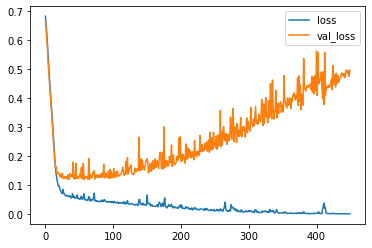

In [24]:
losses.plot()

In [25]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1 , activation="sigmoid"))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This cal

In [42]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, verbose=1, callbacks = [early_stop], validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6842 - val_loss: 0.6680
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6539 - val_loss: 0.6363
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.5882
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5619 - val_loss: 0.5293
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4952 - val_loss: 0.4567
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4194 - val_loss: 0.3744
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3443 - val_loss: 0.3020
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2877 - val_loss: 0.2612
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2487 - val_loss: 0.2161
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2192 - val_loss: 0.1939
Epoch 11/

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses

,loss,val_loss
0,0.684196,0.667998
1,0.653880,0.636257
2,0.614398,0.588162
3,0.561864,0.529264
4,0.495189,0.456716
...,...,...
70,0.047316,0.092511
71,0.044844,0.100099
72,0.044093,0.100176
73,0.042188,0.114289


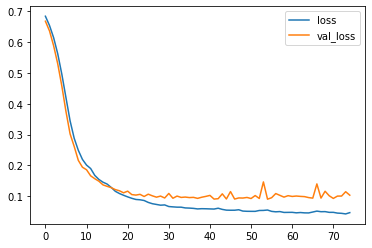

In [32]:
losses.plot()

In [43]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))
# model.add(Dense(units=15, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(units=1 , activation="sigmoid"))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model.fit(x=X_train, y=y_train, epochs=600, verbose=1, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7040 - val_loss: 0.6937
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6881 - val_loss: 0.6813
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6793 - val_loss: 0.6677
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6557
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6605 - val_loss: 0.6406
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6367 - val_loss: 0.6238
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.5994
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5963 - val_loss: 0.5650
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5830 - val_loss: 0.5312
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5632 - val_loss: 0.5016
Epoch 11/

14/14 [==============================] - 0s 4ms/step - loss: 0.1422 - val_loss: 0.0975
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1185 - val_loss: 0.0949
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1220 - val_loss: 0.1006
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 0.1055
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1364 - val_loss: 0.0977
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1329 - val_loss: 0.0986
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1335 - val_loss: 0.0990
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1147 - val_loss: 0.0988
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1083 - val_loss: 0.0966
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1241 - val_loss: 0.0994
Epoch 93/600


In [45]:
losses = pd.DataFrame(model.history.history)

In [46]:
losses

,loss,val_loss
0,0.704050,0.693673
1,0.688119,0.681341
2,0.679260,0.667707
3,0.668023,0.655698
4,0.660524,0.640642
...,...,...
141,0.090610,0.103728
142,0.088441,0.099546
143,0.096998,0.102179
144,0.079126,0.098541


In [47]:
losses.iplot()

In [48]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [51]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(confusion_matrix(predictions,y_test))

[[53  0]
 [ 2 88]]


In [54]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.98      0.99        90

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

